In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [ ]:
pip install chart-studio

#**CONTENT:**

1. Read and Overview Data

2. Data Preparation

3. Create CNN Model

4. Train and Test the Model

5. Plotting Results

6. Conclusion

# **1. Read and Overview Data**

**import all necessary modules**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 

import seaborn as sns
import cv2

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import os
print(os.listdir("/content/gdrive/MyDrive/Colab Notebooks/flowers"))

['daisy', 'tulip', 'sunflower', 'rose', 'dandelion']


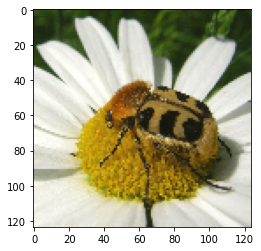

In [ ]:
# plotting a random image
img = plt.imread("/content/gdrive/MyDrive/Colab Notebooks/flowers/daisy/154332674_453cea64f4.jpg")
img = cv2.resize(img,(124,124))
plt.imshow(img)
plt.axis("on")
plt.show()

**Read all datas then create x and y datas**

In [ ]:
x_ = list()
y = list()
IMG_SIZE = 128
for i in os.listdir("/content/gdrive/MyDrive/Colab Notebooks/flowers/daisy"):
    try:
        path = "/content/gdrive/MyDrive/Colab Notebooks/flowers/daisy/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(0)
    except:
        None
for i in os.listdir("/content/gdrive/MyDrive/Colab Notebooks/flowers/dandelion"):
    try:
        path = "/content/gdrive/MyDrive/Colab Notebooks/flowers/dandelion/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(1)
    except:
        None
for i in os.listdir("/content/gdrive/MyDrive/Colab Notebooks/flowers/rose"):
    try:
        path = "/content/gdrive/MyDrive/Colab Notebooks/flowers/rose/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(2)
    except:
        None
for i in os.listdir("/content/gdrive/MyDrive/Colab Notebooks/flowers/sunflower"):
    try:
        path = "/content/gdrive/MyDrive/Colab Notebooks/flowers/sunflower/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(3)
    except:
        None
for i in os.listdir("/content/gdrive/MyDrive/Colab Notebooks/flowers/tulip"):
    try:
        path = "/content/gdrive/MyDrive/Colab Notebooks/flowers/tulip/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(4)
    except:
        None
x_ = np.array(x_)

**let's see how the images look**

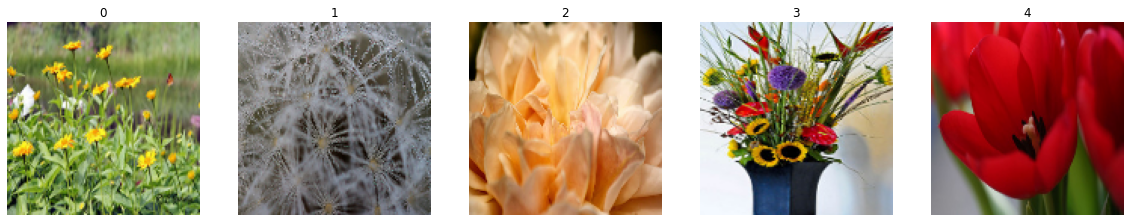

In [ ]:
#plottin one of all flower types in data
plt.figure(figsize = (20,20))
for i in range(5):
    img = x_[950*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y[950*i])

# **2. Data Preparation**

**replace flower types for the computer to understand**

In [ ]:
# for replacement process i'll use keras.to_categorical 
from keras.utils.np_utils import to_categorical
y = to_categorical(y,num_classes = 5)

**Firsly split test data then split train and validation datas**

In [ ]:
# test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_,y,test_size = 0.15,random_state = 42)

In [ ]:
# validation and trains split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.15,random_state = 42)

**Plotting random 5 image in train data**

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



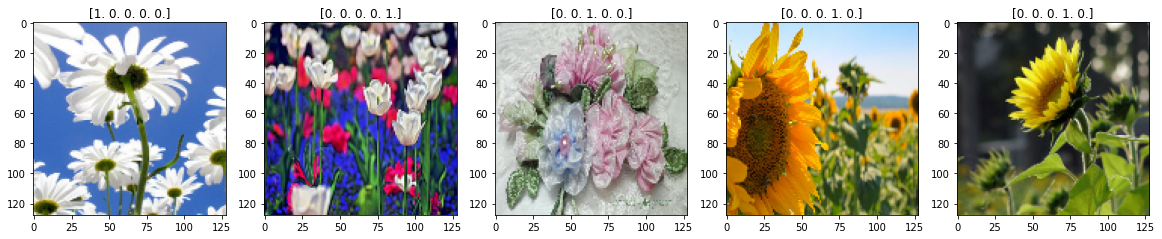

In [ ]:
plt.figure(figsize = (20,20))
for i in range(5):
    img = x_train[600*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("on")
    plt.title(y_train[600*i])
plt.show()

In [ ]:
x_train.shape # look traing shape

(3122, 128, 128, 3)

# **3. Create CNN Model**

**Create Sequential model with using Keras**

In [ ]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 2nd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 4th Convolutional Layer
model.add(Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 5th Convolutional Layer
model.add(Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
# Add output layer
model.add(Dense(5,activation="softmax"))

model.summary() # print summary my model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) #compile model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       5

**Compile model**

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

**Set epoch and batch size values**

In [ ]:
epoch = 80
batch_size = 64

**Create a data augmentation and apply them x_train data**

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=60,  # randomly rotate images in the range (60, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    ) 
datagen.fit(x_train)

# **4. Train and Test the Model**

Train our model according to the data and the values we have prepared in the previous stages

In [ ]:
history = model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                              epochs= epoch,validation_data=(x_val,y_val),
                              steps_per_epoch=x_train.shape[0] // batch_size
                              )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/80
48/48 [==============================] - 12s 246ms/step - loss: 0.2502 - accuracy: 0.9084 - val_loss: 0.9483 - val_accuracy: 0.7591
Epoch 2/80
48/48 [==============================] - 12s 243ms/step - loss: 0.2155 - accuracy: 0.9281 - val_loss: 0.7070 - val_accuracy: 0.8207
Epoch 3/80
48/48 [==============================] - 11s 239ms/step - loss: 0.2566 - accuracy: 0.9035 - val_loss: 0.6988 - val_accuracy: 0.8043
Epoch 4/80
48/48 [==============================] - 11s 238ms/step - loss: 0.2315 - accuracy: 0.9147 - val_loss: 0.6225 - val_accuracy: 0.8333
Epoch 5/80
48/48 [==============================] - 12s 241ms/step - loss: 0.2114 - accuracy: 0.9176 - val_loss: 0.8832 - val_accuracy: 0.7790
Epoch 6/80
48/48 [==============================] - 12s 239ms/step - loss: 0.2290 - accuracy: 0.9156 - val_loss: 0.8850 - val_accuracy: 0.7572
Epoch 7/80
48/48 [==============================] - 12s 243ms/step - loss: 0.1987 - accuracy: 0.9238 - val_loss: 0.8034 - val_accuracy: 0.7862

In [ ]:
print("Test Accuracy: {0:.2f}%".format(model.evaluate(x_test,y_test)[1]*100)) #get score acording to test datas

21/21 [==============================] - 0s 14ms/step - loss: 0.8691 - accuracy: 0.8290
Test Accuracy: 82.90%


# **5.  Plotting Results**

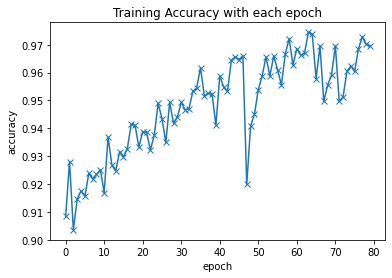

In [ ]:
train_loss = history.history['loss'], # get loss values from the history
train_acc = history.history['accuracy']
#plt.plot(train_loss, '-x')
plt.plot(train_acc, '-x')
plt.xlabel('epoch')
plt.ylabel('training accuracy')
#plt.legend(['Training loss', 'Training accuracy'])
plt.title('Training Accuracy with each epoch');

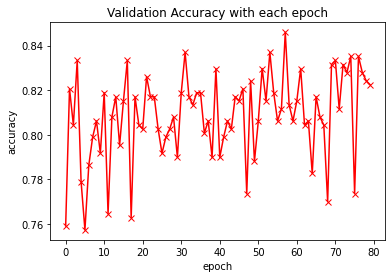

In [ ]:
#train_loss = history.history['loss'], # get loss values from the history
val_acc = history.history['val_accuracy']
#plt.plot(train_loss, '-x')
plt.plot(val_acc, '-rx')
plt.xlabel('epoch')
plt.ylabel('accuracy')
#plt.legend(['Training loss', 'Training accuracy'])
plt.title('Validation Accuracy with each epoch');

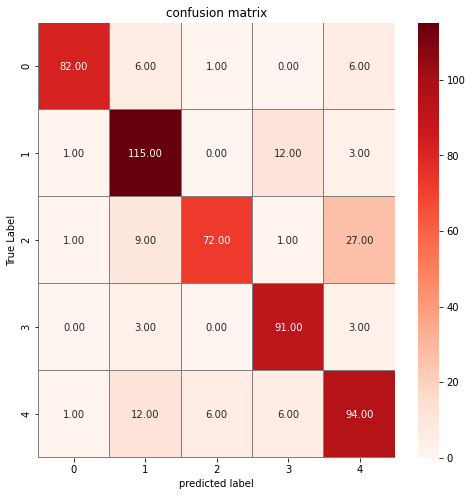

In [ ]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_val,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Reds",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

 0,1,2,3,4 values in this matrix means daisies, dandelions, roses, sunflowers, tuilps respectively